#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *


##### Load data

In [2]:
train = pd.read_csv('../input/healthcare/Train_2/Train/Train.csv')
sub = pd.read_csv('../input/healthcare/sample_submmission.csv')
test = pd.read_csv('../input/healthcare/test_l0Auv8Q.csv')
fh = pd.read_csv('../input/healthcare/Train_2/Train/First_Health_Camp_Attended.csv')
sh = pd.read_csv('../input/healthcare/Train_2/Train/Second_Health_Camp_Attended.csv')
th = pd.read_csv('../input/healthcare/Train_2/Train/Third_Health_Camp_Attended.csv')
pp = pd.read_csv('../input/healthcare/Train_2/Train/Patient_Profile.csv')
hc = pd.read_csv('../input/healthcare/Train_2/Train/Health_Camp_Detail.csv')

In [3]:
train.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7


In [4]:
desc=train.describe()

In [5]:

desc.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5
count,75278.000000,75278.000000,75278.000000,75278.000000,75278.000000,75278.000000,75278.000000
mean,507233.325660,6547.597319,0.796156,0.238556,0.000385,0.022424,0.248386
std,12404.734886,19.272983,7.626687,3.769594,0.019624,0.199570,1.213938
min,485679.000000,6523.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,496505.250000,6534.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,507276.500000,6541.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,517919.000000,6562.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,528657.000000,6587.000000,288.000000,156.000000,1.000000,4.000000,31.000000


In [6]:
test.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0


In [7]:
desc1=test.describe()

In [8]:

desc1.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5
count,35249.000000,35249.000000,35249.000000,35249.000000,35249.000000,35249.000000,35249.000000
mean,507020.926863,6568.160373,0.819201,0.253312,0.000567,0.041845,0.258163
std,12478.669016,13.212263,8.298817,3.984690,0.023814,0.268826,1.311230
min,485678.000000,6525.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,496203.000000,6556.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,507018.000000,6568.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,517869.000000,6582.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,528657.000000,6584.000000,344.000000,181.000000,1.000000,8.000000,34.000000


In [9]:
sub.head(2)

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.5
1,500633,6584,0.5


In [10]:
desc2=sub.describe()

In [11]:

desc2.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,Patient_ID,Health_Camp_ID,Outcome
count,35249.000000,35249.000000,35249.000000
mean,507020.926863,6568.160373,0.500000
std,12478.669016,13.212263,0.000000
min,485678.000000,6525.000000,0.500000
25%,496203.000000,6556.000000,0.500000
50%,507018.000000,6568.000000,0.500000
75%,517869.000000,6582.000000,0.500000
max,528657.000000,6584.000000,0.500000


In [12]:
fh.head(2)

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN


In [13]:
fh.isnull().sum()

Patient_ID           0
Health_Camp_ID       0
Donation             0
Health_Score         0
Unnamed: 4        6218
dtype: int64

In [14]:
cor=fh[['Donation','Health_Score']].corr()

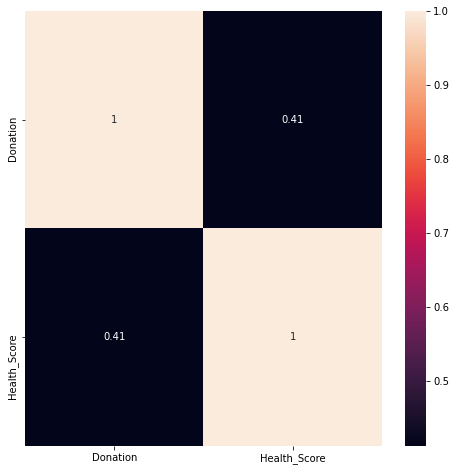

In [15]:
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cor,annot=True)
plt.show()

In [16]:
sh.head(2)

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700


In [17]:
th.head(2)

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1


In [18]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [19]:
pp.head(2)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry


In [20]:
pp['online_Activity_Score']=pp['Online_Follower']+pp['LinkedIn_Shared']+pp['Twitter_Shared']+pp['Facebook_Shared']
del pp['Online_Follower']
del pp['LinkedIn_Shared']
del pp['Twitter_Shared']
del pp['Facebook_Shared']

In [21]:
train.shape,test.shape,sub.shape,fh.shape,sh.shape,th.shape,pp.shape,hc.shape

((75278, 8),
 (35249, 8),
 (35249, 3),
 (6218, 5),
 (7819, 3),
 (6515, 4),
 (37633, 8),
 (65, 6))

#### Preprocessing Data

#### Preprocessing and feature engineering patient profile

In [22]:
pp.isnull().sum()

Patient_ID                   0
Income                       0
Education_Score              0
Age                          0
First_Interaction            0
City_Type                23384
Employer_Category        34793
online_Activity_Score        0
dtype: int64

In [23]:
pp[['Income', 'Education_Score', 'Age']] = pp[['Income', 'Education_Score', 'Age']].apply(lambda x: x.str.replace('None', 'NaN').astype('float'))

In [24]:
pp.head()

,Patient_ID,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,online_Activity_Score
0,516956,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry,0
1,507733,1.0,NaN,40.0,20-Jul-03,H,Software Industry,0
2,508307,3.0,87.0,46.0,02-Nov-02,D,BFSI,0
3,512612,1.0,75.0,47.0,02-Nov-02,D,Education,0
4,521075,3.0,NaN,80.0,24-Nov-02,H,Others,0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['City_Type','Employer_Category']:
    pp[col]=  pp[col].astype('str')
    pp[col]= le.fit_transform(pp[col]) 

In [26]:
pp['first_interaction_year'] = pd.to_datetime(pp['First_Interaction']).dt.year
pp['first_interaction_month'] = pd.to_datetime(pp['First_Interaction']).dt.month
pp['first_interaction_day'] = pd.to_datetime(pp['First_Interaction']).dt.day

In [27]:
pp.head(2)

,Patient_ID,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,online_Activity_Score,first_interaction_year,first_interaction_month,first_interaction_day
0,516956,1.0,90.0,39.0,18-Jun-03,9,10,0,2003,6,18
1,507733,1.0,NaN,40.0,20-Jul-03,7,10,0,2003,7,20


#### Preprocessing and feature engineering Train

In [28]:
train['registration_year'] = pd.to_datetime(train['Registration_Date']).dt.year
train['registration_month'] = pd.to_datetime(train['Registration_Date']).dt.month
train['registration_day'] = pd.to_datetime(train['Registration_Date']).dt.day

In [29]:
train['Registration_Date']=pd.to_datetime(train['Registration_Date'])
train.sort_values(by=['Patient_ID','Registration_Date'],inplace=True)

In [30]:
train['days_since_last_registration'] = train.groupby('Patient_ID')['Registration_Date'].diff().apply(lambda x: x.days)
train['days_since_next_registration'] = train.groupby('Patient_ID')['Registration_Date'].diff(-1) * (-1) / np.timedelta64(1, 'D')       
train.reset_index(drop=True,inplace=True)                                                                                                      

In [31]:
train[['days_since_last_registration','days_since_next_registration']]

,days_since_last_registration,days_since_next_registration
0,NaN,9.0
1,9.0,NaN
2,NaN,NaN
3,NaN,12.0
4,12.0,NaN
...,...,...
75273,NaN,7.0
75274,7.0,12.0
75275,12.0,45.0
75276,45.0,215.0


In [32]:
train['Unique_Health_Camp_per_patient']=train.groupby(['Patient_ID'])['Health_Camp_ID'].transform('nunique')
train['Unique_Patient_per_HealthCamp']=train.groupby(['Health_Camp_ID'])['Patient_ID'].transform('nunique')
train['Unique_year_per_patient']=train.groupby(['Patient_ID'])['registration_year'].transform('nunique')
train['Unique_months_per_patient']=train.groupby(['Patient_ID'])['registration_month'].transform('nunique')
train['Unique_day_per_patient']=train.groupby(['Patient_ID'])['registration_day'].transform('nunique')

In [33]:
train.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_year,registration_month,registration_day,days_since_last_registration,days_since_next_registration,Unique_Health_Camp_per_patient,Unique_Patient_per_HealthCamp,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient
0,485679,6578,2005-08-22,0,0,0,0,0,2005.0,8.0,22.0,NaN,9.0,2,2837,1.0,1.0,2.0
1,485679,6555,2005-08-31,0,0,0,0,0,2005.0,8.0,31.0,9.0,NaN,2,1738,1.0,1.0,2.0


#### Preprocessing and feature engineering Test

In [34]:
test['registration_year'] = pd.to_datetime(test['Registration_Date']).dt.year
test['registration_month'] = pd.to_datetime(test['Registration_Date']).dt.month
test['registration_day'] = pd.to_datetime(test['Registration_Date']).dt.day

In [35]:
test['Registration_Date']=pd.to_datetime(test['Registration_Date'])
test.sort_values(by=['Patient_ID','Registration_Date'],inplace=True)

In [36]:
test['days_since_last_registration'] = test.groupby('Patient_ID')['Registration_Date'].diff().apply(lambda x: x.days)
test['days_since_next_registration'] = test.groupby('Patient_ID')['Registration_Date'].diff(-1) * (-1) / np.timedelta64(1, 'D')
test.reset_index(drop=True,inplace=True)

In [37]:
test['Unique_Health_Camp_per_patient']=test.groupby(['Patient_ID'])['Health_Camp_ID'].transform('nunique')
test['Unique_Patient_per_HealthCamp']=test.groupby(['Health_Camp_ID'])['Patient_ID'].transform('nunique')
test['Unique_year_per_patient']=test.groupby(['Patient_ID'])['registration_year'].transform('nunique')
test['Unique_months_per_patient']=test.groupby(['Patient_ID'])['registration_month'].transform('nunique')
test['Unique_day_per_patient']=test.groupby(['Patient_ID'])['registration_day'].transform('nunique')

In [38]:
test.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_year,registration_month,registration_day,days_since_last_registration,days_since_next_registration,Unique_Health_Camp_per_patient,Unique_Patient_per_HealthCamp,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient
0,485678,6551,2006-11-13,0,0,0,0,0,2006,11,13,NaN,NaN,1,2180,1,1,1
1,485683,6584,2006-05-29,0,0,0,0,0,2006,5,29,NaN,0.0,5,3041,2,2,2


#### find overlap between train and test sets

In [39]:
cols =  ['Patient_ID']
for col in cols:
  print('Total unique'+col  +' values in Train are {}'.format(train[col].nunique()))
  print('Total unique'+col  +' values in Test are {}'.format(test[col].nunique()))
  print('Common'+col +' values are {}'.format(len(list(set(train[col]) & set(test[col])))))
  

Total uniquePatient_ID values in Train are 29828
Total uniquePatient_ID values in Test are 15324
CommonPatient_ID values are 8460


#### Merging train,test with Patient Profile

In [40]:
train = pd.merge(train, pp, on = 'Patient_ID', how = 'left')
test = pd.merge(test, pp, on = 'Patient_ID', how = 'left')

#### Getting Target

In [41]:
for c in [fh, sh, th, train]:
  c['id'] = c['Patient_ID'].astype('str') + c['Health_Camp_ID'].astype('str')
th = th[th['Number_of_stall_visited'] > 0]

all_patients_in_camp = pd.Series(fh['id'].tolist() + sh['id'].tolist() + th['id'].tolist()).unique()

train['target'] = 0
train.loc[train['id'].isin(all_patients_in_camp), 'target'] = 1

In [42]:
train[['id','target']]

,id,target
0,4856796578,1
1,4856796555,0
2,4856806543,0
3,4856816580,0
4,4856816526,0
...,...,...
75273,5286576531,1
75274,5286576580,0
75275,5286576526,0
75276,5286576536,1


In [43]:
train['target'].value_counts()

0    54744
1    20534
Name: target, dtype: int64

In [44]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [45]:
def timediff(duration):
    duration_in_s = duration.total_seconds()
    days = divmod(duration_in_s, 86400)[0]
    return days

In [46]:
hc['Camp_Duration']=pd.to_datetime(hc['Camp_End_Date'])-pd.to_datetime(hc['Camp_Start_Date'])
hc['Camp_Duration']=hc['Camp_Duration'].apply(timediff)

In [47]:
hc['camp_start_year'] = pd.to_datetime(hc['Camp_Start_Date']).dt.year
hc['camp_start_month'] = pd.to_datetime(hc['Camp_Start_Date']).dt.month
hc['camp_start_day'] = pd.to_datetime(hc['Camp_Start_Date']).dt.day

hc['camp_end_year'] = pd.to_datetime(hc['Camp_End_Date']).dt.year
hc['camp_end_month'] = pd.to_datetime(hc['Camp_End_Date']).dt.month
hc['camp_end_day'] = pd.to_datetime(hc['Camp_End_Date']).dt.day

In [48]:
hc['Category1'] = hc['Category1'].map({'First': 1, 'Second': 2, 'Third': 3})
hc['Category2'] = pd.factorize(hc['Category2'])[0]

In [49]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration,camp_start_year,camp_start_month,camp_start_day,camp_end_year,camp_end_month,camp_end_day
0,6560,16-Aug-03,20-Aug-03,1,0,2,4.0,2003,8,16,2003,8,20
1,6530,16-Aug-03,28-Oct-03,1,1,2,73.0,2003,8,16,2003,10,28


#### Merging train,test with health camp details

In [50]:
train = pd.merge(train, hc, on = 'Health_Camp_ID', how = 'left')
test = pd.merge(test, hc, on = 'Health_Camp_ID', how = 'left')

#### More Feature Engineering

In [51]:
train['Unique_camp_year_per_patient']=train.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
train['Unique_camp_months_per_patient']=train.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
train['Unique_camp_day_per_patient']=train.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

In [52]:
test['Unique_camp_year_per_patient']=test.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
test['Unique_camp_months_per_patient']=test.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
test['Unique_camp_day_per_patient']=test.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

#### Concat

In [53]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

#### numeric aggregate feataures grouped by patient_ID

In [54]:
def agg_numeric(df, parent_var, df_name):      
    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').drop(columns={'Patient_ID', 'Health_Camp_ID','target'}).copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [55]:
PID_aggregate = agg_numeric(df, 'Patient_ID', 'agg')
print('PID aggregate shape: ', PID_aggregate.shape)
df=df.merge(PID_aggregate, on ='Patient_ID', how = 'left')

PID aggregate shape:  (36692, 141)


In [56]:
df['Patient_Registered_before_days']=pd.to_datetime(df['Camp_Start_Date'])-pd.to_datetime(df['Registration_Date'])
df['Patient_Registered_before_days']=df['Patient_Registered_before_days'].apply(timediff)

In [57]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

#### Creating Time based validation for 5 months ,as same as public and private test period

In [58]:
trn=train[train['Camp_Start_Date'] <'2005-11-01']
val=train[train['Camp_Start_Date'] >'2005-10-30']

In [59]:
train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'registration_year', 'registration_month',
       ...
       'agg_Income_mean', 'agg_Income_max', 'agg_Income_min', 'agg_Age_mean',
       'agg_Age_max', 'agg_Age_min', 'agg_Education_Score_mean',
       'agg_Education_Score_max', 'agg_Education_Score_min',
       'Patient_Registered_before_days'],
      dtype='object', length=187)

In [60]:
TARGET_COL = 'target'
features = [c for c in trn.columns if c not in ['Patient_ID', 'Health_Camp_ID','Category3','Registration_Date', 'id','target','Camp_Start_Date','Camp_End_Date','First_Interaction',TARGET_COL]]
len(features)

178

#### validating the data

In [61]:
from lightgbm import LGBMClassifier

In [62]:
clf = LGBMClassifier(n_estimators=550,
                     learning_rate=0.03,
                     min_child_samples=40,
                     random_state=1,
                     colsample_bytree=0.5,
                     reg_alpha=2,
                     reg_lambda=2)

clf.fit(trn[features], trn[TARGET_COL], eval_set=[(val[features], val[TARGET_COL])], verbose=50,
        eval_metric = 'auc', early_stopping_rounds = 100)

preds = clf.predict_proba(test[features])[:, 1]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.834735	valid_0's binary_logloss: 0.423667
[100]	valid_0's auc: 0.841262	valid_0's binary_logloss: 0.400654
[150]	valid_0's auc: 0.84321	valid_0's binary_logloss: 0.394771
[200]	valid_0's auc: 0.844005	valid_0's binary_logloss: 0.393559
[250]	valid_0's auc: 0.844655	valid_0's binary_logloss: 0.392633
[300]	valid_0's auc: 0.844292	valid_0's binary_logloss: 0.392153
[350]	valid_0's auc: 0.844625	valid_0's binary_logloss: 0.392478
Early stopping, best iteration is:
[262]	valid_0's auc: 0.845152	valid_0's binary_logloss: 0.391976


#### Removing 0 importance feature didnt help

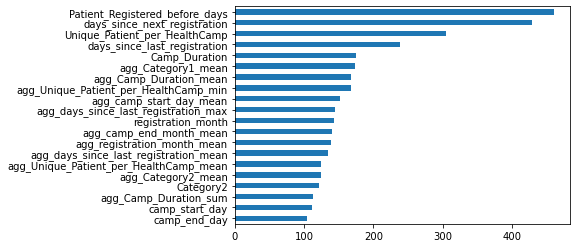

In [63]:
fi = pd.Series(index = features, data = clf.feature_importances_)
fi.sort_values(ascending=False)[0:20][::-1].plot(kind = 'barh')

#### Final Model

#### Blending with different seeds

In [64]:
preds = 0
for seed_val in [1,3,10,15,20,33,333,1997,2020,2021]:
    print (seed_val)
    m=LGBMClassifier(n_estimators=450,learning_rate=0.03,random_state=seed_val,colsample_bytree=0.5,reg_alpha=2,reg_lambda=2)
    m.fit(train[features],train['target'])
    predict=m.predict_proba(test[features])[:,1]
    preds += predict
preds = preds/10

1
3
10
15
20
33
333
1997
2020
2021


In [65]:
sub = pd.DataFrame({"Patient_ID":test.Patient_ID.values})
sub["Health_Camp_ID"] = test.Health_Camp_ID.values
sub["Outcome"] =  preds
sub.to_csv("lgbmblending.csv", index=False)